Trying to reproduce https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
no wait, this one works much better:
https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

In [1]:
#!pip install --user git+https://github.com/markusloecher/shap

In [67]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
df = pd.read_csv('./titanicnoMissingAge.csv') # Load the data

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,Q
710,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,NaN,S
711,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,C148,C


In [32]:

Y = df['Survived']
X =  df[['Age', 'Pclass','Sex', 'PassengerId']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

[0.27822729 0.12924936 0.27111602 0.32140733]


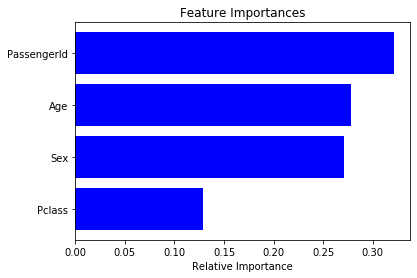

In [42]:
rf = RandomForestRegressor(max_depth=50, random_state=0, n_estimators=100,max_features=2)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

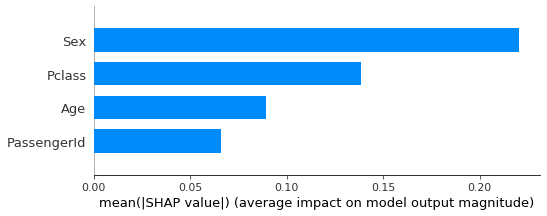

In [44]:
import shap
shap_values = shap.TreeExplainer(rf).shap_values(X_train)

In [89]:
shap_values.shape

(571, 4)

In [93]:
shap_values[1:5,:]

array([[-0.04695937, -0.10164199, -0.16812878, -0.05749053],
       [ 0.03216031,  0.38002645, -0.1446667 ,  0.16825927],
       [ 0.06087876,  0.21251984,  0.30945668,  0.02292406],
       [ 0.20801168, -0.02708429, -0.14211771,  0.28696965]])

In [83]:
#shap_values_test = shap.TreeExplainer(rf).shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [90]:
#shap_values_test.shape

(143, 4)

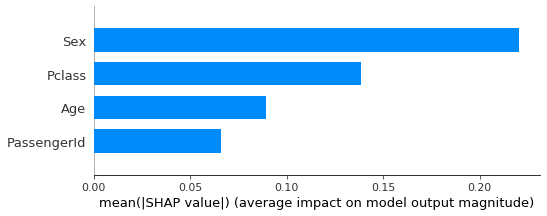

In [82]:
#f=shap.summary_plot(shap_values, X_train, plot_type="bar")

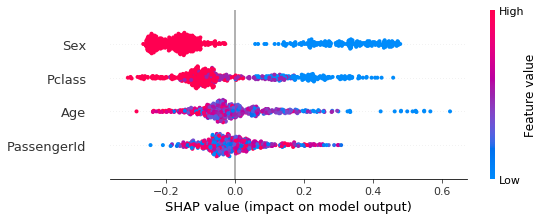

In [72]:
shap.summary_plot(shap_values, X_train,show=False)

In [73]:
import matplotlib.pyplot as plt
plt.savefig("./figures/TitanicSHAP1.pdf")

<Figure size 432x288 with 0 Axes>

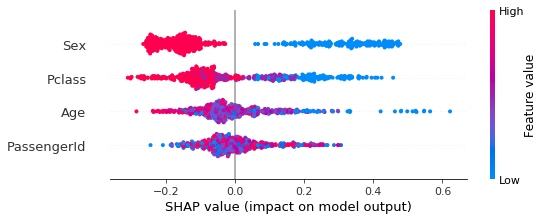

In [40]:
shap.summary_plot(shap_values, X_train)

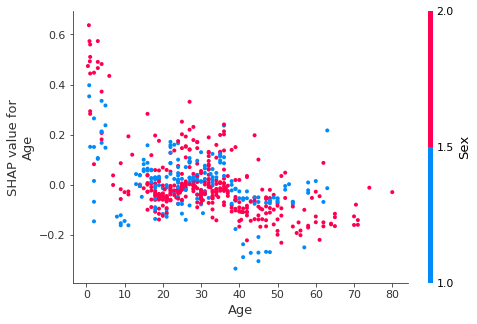

In [36]:
shap.dependence_plot("Age", shap_values, X_train)

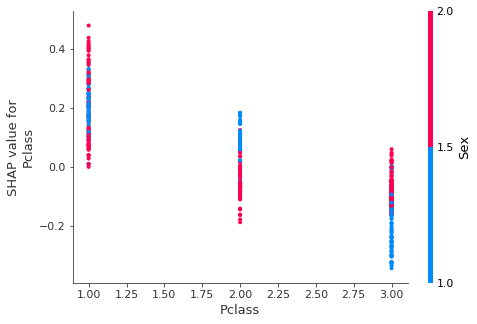

In [37]:
shap.dependence_plot("Pclass", shap_values, X_train)

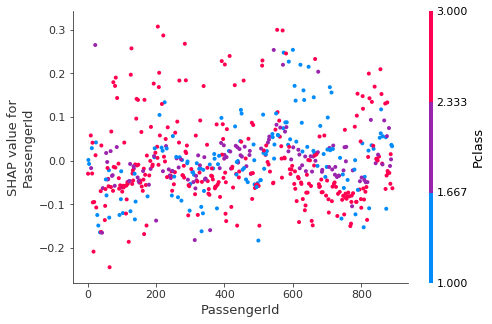

In [41]:
shap.dependence_plot("PassengerId", shap_values, X_train)

In [19]:
# plot the SHAP values for the 10th observation 
shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:])

NameError: name 'rf_explainer' is not defined

In [ ]:
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)

GBM

In [20]:
from sklearn import ensemble
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            validation_fraction=0.2,
            n_iter_no_change=5, 
            tol=0.01,
            random_state=0)
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=0)
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
import shap
gbm_shap_values = shap.KernelExplainer(gbm.predict,X_test)

Using 320 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [22]:
shap.summary_plot(gbm_shap_values, X_test)

AttributeError: 'KernelExplainer' object has no attribute 'shape'